###### Translated by Huizhe Di @ SCSIO

二维P-SV波在均匀块体模型中的传播
====

波在一般弹性介质中的传播可以用耦合线性偏微分方程组来描述。它们由运动方程组成

$$\rm{\rho \frac{\partial v_i}{\partial t} = \frac{\partial \sigma_{ij}}{\partial x_j} + fs_i}$$
   
它只是描述了介质中粒子的动量, 介质的密度 $\rm{\rho}$ 和位移速度 $\rm{v_i}$, 可以被表面的力改变, 它被描述为应力张量 $\rm{\sigma_{ij}}$ 或者体力 $\rm{fs_i}$。这些方程描述了一般的介质，如气体、流体、固体或等离子体。材料的特定性质是由描述介质在施加某种力时如何反应的附加方程引入的。在各向同性弹性情况下，这可以用线性应力-应变关系来描述:  

$$\begin{split}
\rm{\sigma_{ij}}&\rm{=\lambda \theta \delta_{ij} + 2 \mu \epsilon_{ij}}\\
\rm{\epsilon_{ij}}&\rm{=\frac{1}{2}\biggl(\frac{\partial u_i}{\partial x_j}+\frac{\partial u_j}{\partial x_i}\biggr)}
\end{split}
$$

这里 $\rm{\lambda}$ 和 $\rm{\mu}$ 为Lamé系数, $\rm{\epsilon_{ij}}$ 为应变张量, $\rm{\theta = \epsilon_{11} + \epsilon_{22} + \epsilon_{33}}$ 为体积膨胀, $\rm{\delta_{ij}}$ 为Kronecker Delta，$\rm{u_i}$ 为位移。通过对应力-应变关系和应变张量求时间导数，我们可以推导出描述波在一般三维各向同性弹性介质中的传播的偏微分方程:

$$\begin{split}
\rm{\rho \frac{\partial v_i}{\partial t}} &\rm{= \frac{\partial \sigma_{ij}}{\partial x_j} + fs_i}\\
\rm{\frac{\partial \sigma_{ij}}{\partial t}} &\rm{= \lambda \frac{\partial \theta}{\partial t} \delta_{ij} + 2 \mu \frac{\partial \epsilon_{ij}}{\partial t}}\\
\rm{\frac{\partial \epsilon_{ij}}{\partial t}}&\rm{=\frac{1}{2}\biggl(\frac{\partial v_i}{\partial x_j}+\frac{\partial v_j}{\partial x_i}\biggr)}
\end{split}
$$

二维P-SV波传播在各向同性弹性介质中的运动方程
----

在存在一定对称性和模型局限性的情况下，可以显著简化一般三维地震波在各向同性弹性介质中的传播。 假设在x-y平面上只有非零的粒子位移 (PSV问题), 这里 x 代表水平距离，y为深度, 波的传播可以用下面的偏微分方程组来描述:

$$\rm{\rho \frac{\partial v_x}{\partial t} = \frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y} + fs_x,} $$


$$\rm{\rho \frac{\partial v_y}{\partial t} = \frac{\partial \sigma_{xy}}{\partial x} + \frac{\partial \sigma_{yy}}{\partial y} + fs_y,} $$

$$\rm{\frac{\partial \sigma_{xx}}{\partial t} = (\lambda + 2 \mu) \frac{\partial v_{x}}{\partial x} + \lambda \frac{\partial v_{y}}{\partial y},} $$

$$\rm{\frac{\partial \sigma_{yy}}{\partial t} = \lambda \frac{\partial v_{x}}{\partial x} + (\lambda + 2 \mu) \frac{\partial v_{y}}{\partial y},} $$

$$\rm{\frac{\partial \sigma_{xy}}{\partial t} = \mu \biggl(\frac{\partial v_{x}}{\partial y} + \frac{\partial v_{y}}{\partial x}\biggr),}  $$

这里 $\rm{\rho}$ 为密度, $\rm{\lambda}$ 和 $\rm{\mu}$ 为Lamé系数, $\rm{(v_x,\; v_y)}$ 为粒子速度向量, $\rm{\sigma_{xx}}$, $\rm{\sigma_{yy}}$, $\rm{\sigma_{xy}}$ 为应力张量分量, ($\rm{fs_x}$, $\rm{fs_y}$) 为直接体力向量。

有限差分离散化在一个交错网格
----

弹性运动方程的数值解必须在网格上进行时间和空间离散。粒子速度 $\rm{\mathbf{v}}$, 应力 $\rm{\sigma_{ij}}$, Lamé系数 $\rm{\lambda}$ 和$\rm{\mu}$ 在离散的笛卡尔坐标系上 $\rm{x=i\; dh}$, $\rm{y=j\; dh}$ 和离散的时间 $\rm{t=n\; dt}$ 上被定义和计算。
$\rm{dh}$ 表示两个相邻网格点之间的空间距离，$\rm{dt}$ 为两个连续时间步长的差值。因此每个网格点都位于区间内 $\rm{i \in N | [1,nx]}$, $\rm{j \in N | [1,ny]}$ and $\rm{n \in N | [1,nt]}$, 这里
$\rm{nx}$, $\rm{ny}$ and $\rm{nt}$ 分别为离散空间网格点的个数和时间步长。

最后，偏导数由 **有限差分 (FD)** 算子替换。可以区分两种类型的运算符，前向运算符和后向运算符 $\rm{D^+,\;D^-}$。 函数f(x)对变量x的导数可以用下列二阶算子近似表示:

$$\rm{D^+_x f = \frac{f_{i+1}-f_{i}}{dh} \hspace{1 cm} \text{前向算子}} $$

$$\rm{D^-_x f = \frac{f_i-f_{i-1}}{dh} \hspace{1 cm} \text{后向算子}} $$

为了计算波场变量在正确位置上相对于彼此的空间导数，变量不是放在相同的网格点上，而是交错放置空间网格点距离的一半 ([Virieux 1986](https://www.researchgate.net/publication/228078301_P-SV_wave_propagation_in_heterogeneous_media_Velocity-stress_finite-difference_method)). 
图1显示了材料参数和波场变量在空间网格上的分布。 
为了保证 **交错网格** 代码的稳定性, Lamé系数 $\rm{\mu}$ 和密度 $\rm{\rho}$ 必须在水平方向上算术平均 ([Moczo et al. 2004](http://www.quest-itn.org/library/training-material/the-finite-difference-method-for-seismologists.-an-introduction/at_download/file), [Bohlen 2006](https://www.researchgate.net/publication/249866080_Accuracy_of_heterogeneous_staggered-grid_finite-difference_modeling_of_Rayleigh_waves)), 

$$\rm{\mu_{xy}(j+1/2,i+1/2)=\biggl[\frac{1}{4}\biggl(\mu^{-1}_{j,i}+\mu^{-1}_{j,i+1}+\mu^{-1}_{j+1,i+1}+\mu^{-1}_{j+1,i}\biggr)\biggr]^{-1}} $$

$$\rm{\rho_x(j,i+1/2) = 0.5\, (\rho_{j,i+1}+\rho_{j,i})} $$

$$\rm{\rho_y(j+1/2,i) = 0.5\, (\rho_{j+1,i}+\rho_{j,i})} $$

![Staggered grid](./fig/SSG_cart_new_small.png)


### 运动方程的离散化

在下一步，我们使用交错有限差分方法离散二维PSV问题的运动方程。首先，我们通过近似空间导数来离散动量方程的x分量

$$\rm{\frac{\partial \sigma_{xx}}{\partial x} \approx \frac{\sigma_{xx}(j,i+1) - \sigma_{xx}(j,i)}{dh}}, \rm{\frac{\partial \sigma_{xy}}{\partial y} \approx \frac{\sigma_{xy}(j+1/2, i) - \sigma_{xy}(j-1/2,i)}{dh}} $$

x动量方程的左边

$$\rho \rm{\frac{\partial v_x}{\partial t} \approx \rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt}} $$

插入偏微分方程

$$\rm{\rho \frac{\partial v_x}{\partial t} = \frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y}} $$

得到

$$\rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt} = \frac{\sigma_{xx}^n(j,i+1) - \sigma_{xx}^n(j,i)}{dh} + \frac{\sigma_{xy}^n(j+1/2, i) - \sigma_{xy}^n(j-1/2,i)}{dh} $$

重排 $v_x^{n+1/2}(j,i+1/2)$，我们得到动量方程x分量的显式有限差分格式如下:

$$\rm{v_x^{n+1/2}(j,i+1/2) = v_x^{n-1/2}(j,i+1/2) + \frac{dt}{dh\cdot \rho_x(j,i+1/2)}\cdot \biggl(\sigma^n_{xx}(j,i+1) - \sigma^n_{xx}
(j,i) + \sigma^n_{xy}(j+1/2, i) - \sigma^n_{xy}(j-1/2,i) \biggr)} $$

使用类似的方法，我们得到动量方程y分量的显式有限差分格式如下 ...

$$\rm{v_y^{n+1/2}(j,i+1/2) = v_y^{n-1/2}(j,i+1/2) + \frac{dt}{dh\cdot \rho_y(j+1/2,i)}\cdot \biggl(\sigma^n_{xy}(j, i+1/2) - \sigma^n_{xy}(j,i-1/2) + \sigma^n_{yy}(j+1,i) - \sigma^n_{yy}(j,i) \biggr)} $$

... 和应力-应变关系 ...

$$
\begin{split}   
\rm{\sigma^{n+1}_{xx}(j,i)}\;&\rm{= \sigma_{xx}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{yy}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{xx}(j,i)}\\ 
\rm{\sigma^{n+1}_{yy}(j,i)}\;&\rm{= \sigma_{yy}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{yy}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{yy}(j,i)}\\ 
\rm{\sigma^{n+1}_{xy}(j+1/2,i+1/2)}\;&\rm{=\sigma^{n}_{xy}(j+1/2,i+1/2) + dt\cdot\mu_{xy}(j+1/2,i+1/2)\biggl(v^{n+1/2}_{xy}(j+1/2,i+1/2) + v^{n+1/2}_{yx}(j+1/2,i+1/2)\biggr)}\\
\end{split}
$$

通过空间导数

$$
\begin{split}  
\rm{v_{xx}(j,i)}\; & \rm{= \frac{v_x(j,i+1/2)-v_x(j,i-1/2)}{dh}}\\ 
\rm{v_{yy}(j,i)}\; & \rm{= \frac{v_y(j+1/2,i)-v_y(j-1/2,i)}{dh}}\\ 
\rm{v_{yx}(j+1/2,i+1/2)}\; & \rm{= \frac{v_y(j+1/2, i+1)-v_y(j+1/2, i)}{dh}}\\ 
\rm{v_{xy}(j+1/2,i+1/2)}\; & \rm{= \frac{v_x(j+1,i+1/2)-v_x(j, i+1/2)}{dh}}\\
\end{split}
$$

实现二维P-SV代码
----

In [1]:
# load all necessary libraries 
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
%matplotlib notebook

In [2]:
# spatial discretization
nx = 601
ny = 601
dh = 5.0
x = numpy.linspace(0, dh*(nx-1), nx)
y = numpy.linspace(0, dh*(ny-1), ny)
X, Y = numpy.meshgrid(x, y)

# time discretization
T = 0.55
dt = 0.6e-3
nt = numpy.floor(T/dt)
nt = nt.astype(int)

# snapshot frequency [timesteps] 
isnap = 10

# wavefield clip
clip = 2.5e-2

In [3]:
# define model parameters
rho = 7100.0
vp = 2955.0
vs = 2362.0
mu = rho * vs * vs
lam = rho * vp * vp - 2 * mu

因为我们目前处理的是均匀块体模型，我们不必分别关心密度和剪切模量的算术和调和平均。下一步，我们定义颗粒速度和应力的FD更新，并组装二维P-SV有限差分代码。

**更新粒子速度**

In [4]:
@jit(nopython=True) # use JIT for C-performance
def update_v(vx, vy, sxx, syy, sxy, nx, ny, dtdx, rhoi):
    
    for j in range(1, ny-1):
        for i in range(1, nx-1):
                
            # calculate spatial derivatives    
            sxx_x = sxx[j, i+1] - sxx[j, i]
            syy_y = syy[j+1, i] - syy[j, i]
            sxy_x = sxy[j, i] - sxy[j, i-1]
            sxy_y = sxy[j, i] - sxy[j-1, i]        
        
            # update particle velocities 
            vx[j, i] = vx[j, i] + dtdx * rhoi * (sxx_x + sxy_y)
            vy[j, i] = vy[j, i] + dtdx * rhoi * (sxy_x + syy_y)
        
    return vx, vy    

**更新应力**

In [5]:
@jit(nopython=True) # use JIT for C-performance
def update_s(vx, vy, sxx, syy, sxy, nx, ny, dtdx, lam, mu):
    
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            
            # calculate spatial derivatives
            vxx = vx[j][i] - vx[j][i-1]
            vyy = vy[j][i] - vy[j-1][i]        
            vyx = vy[j][i+1] - vy[j][i]
            vxy = vx[j+1][i] - vx[j][i]
                    
            # update stresses
            sxx[j, i] = sxx[j, i] + dtdx * ( lam * (vxx + vyy) + 2.0 * mu * vxx )
            syy[j, i] = syy[j, i] + dtdx * ( lam * (vxx + vyy) + 2.0 * mu * vyy )
            sxy[j, i] = sxy[j, i] + dtdx * (  mu * (vyx + vxy) )
        
    return sxx, syy, sxy

**组合二维P-SV代码**

In [6]:
def psv_mod(nt, nx, ny, dt, dh, rho, lam, mu, clip, isnap, X, Y):
    
    # initialize wavefields
    vx = numpy.zeros((ny, nx))
    vy = numpy.zeros((ny, nx))
    sxx = numpy.zeros((ny, nx)) 
    syy = numpy.zeros((ny, nx))
    sxy = numpy.zeros((ny, nx))
    
    # define some parameters
    dtdx = dt / dh
    rhoi = 1.0 / rho
    
    # define source wavelet parameters
    fc = 17.0
    tshift = 0.0
    ts = 1.0 / fc
    
    # source position [gridpoints]
    jjs = 300
    iis = 300
    
    # initalize animation 
    fig = pyplot.figure(figsize=(11,7))
    extent = [numpy.min(X),numpy.max(X),numpy.min(X),numpy.max(Y)]
    image = pyplot.imshow(vy, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=-clip, vmax=clip)
    
    pyplot.colorbar()
    pyplot.title('Wavefield vy')
    pyplot.xlabel('X [m]')
    pyplot.ylabel('Y [m]')
    pyplot.gca().invert_yaxis()

    pyplot.ion()
    pyplot.show(block=False)
        
    # loop over timesteps 
    for n in range(nt):                
        
        # define Ricker wavelet
        t = n * dt
        tau = numpy.pi * (t - 1.5 * ts - tshift) / (1.5 * ts)
        amp = (1.0 - 4.0 * tau * tau) * numpy.exp(-2.0 * tau * tau)
        
        # update particle velocities                            
        vx, vy = update_v(vx, vy, sxx, syy, sxy, nx, ny, dtdx, rhoi)
        
        # apply vertical impact source term @ source position
        vy[jjs, iis] = vy[jjs, iis] + amp        
        
        # update stresses                
        sxx, syy, sxy = update_s(vx, vy, sxx, syy, sxy, nx, ny, dtdx, lam, mu)
        
        # display vy snapshots 
        if (n % isnap) == 0:
            image.set_data(vy)
            fig.canvas.draw()
            
    return vx, vy

让我们为均匀块体模型运行二维P-SV代码:

<IPython.core.display.Javascript object>


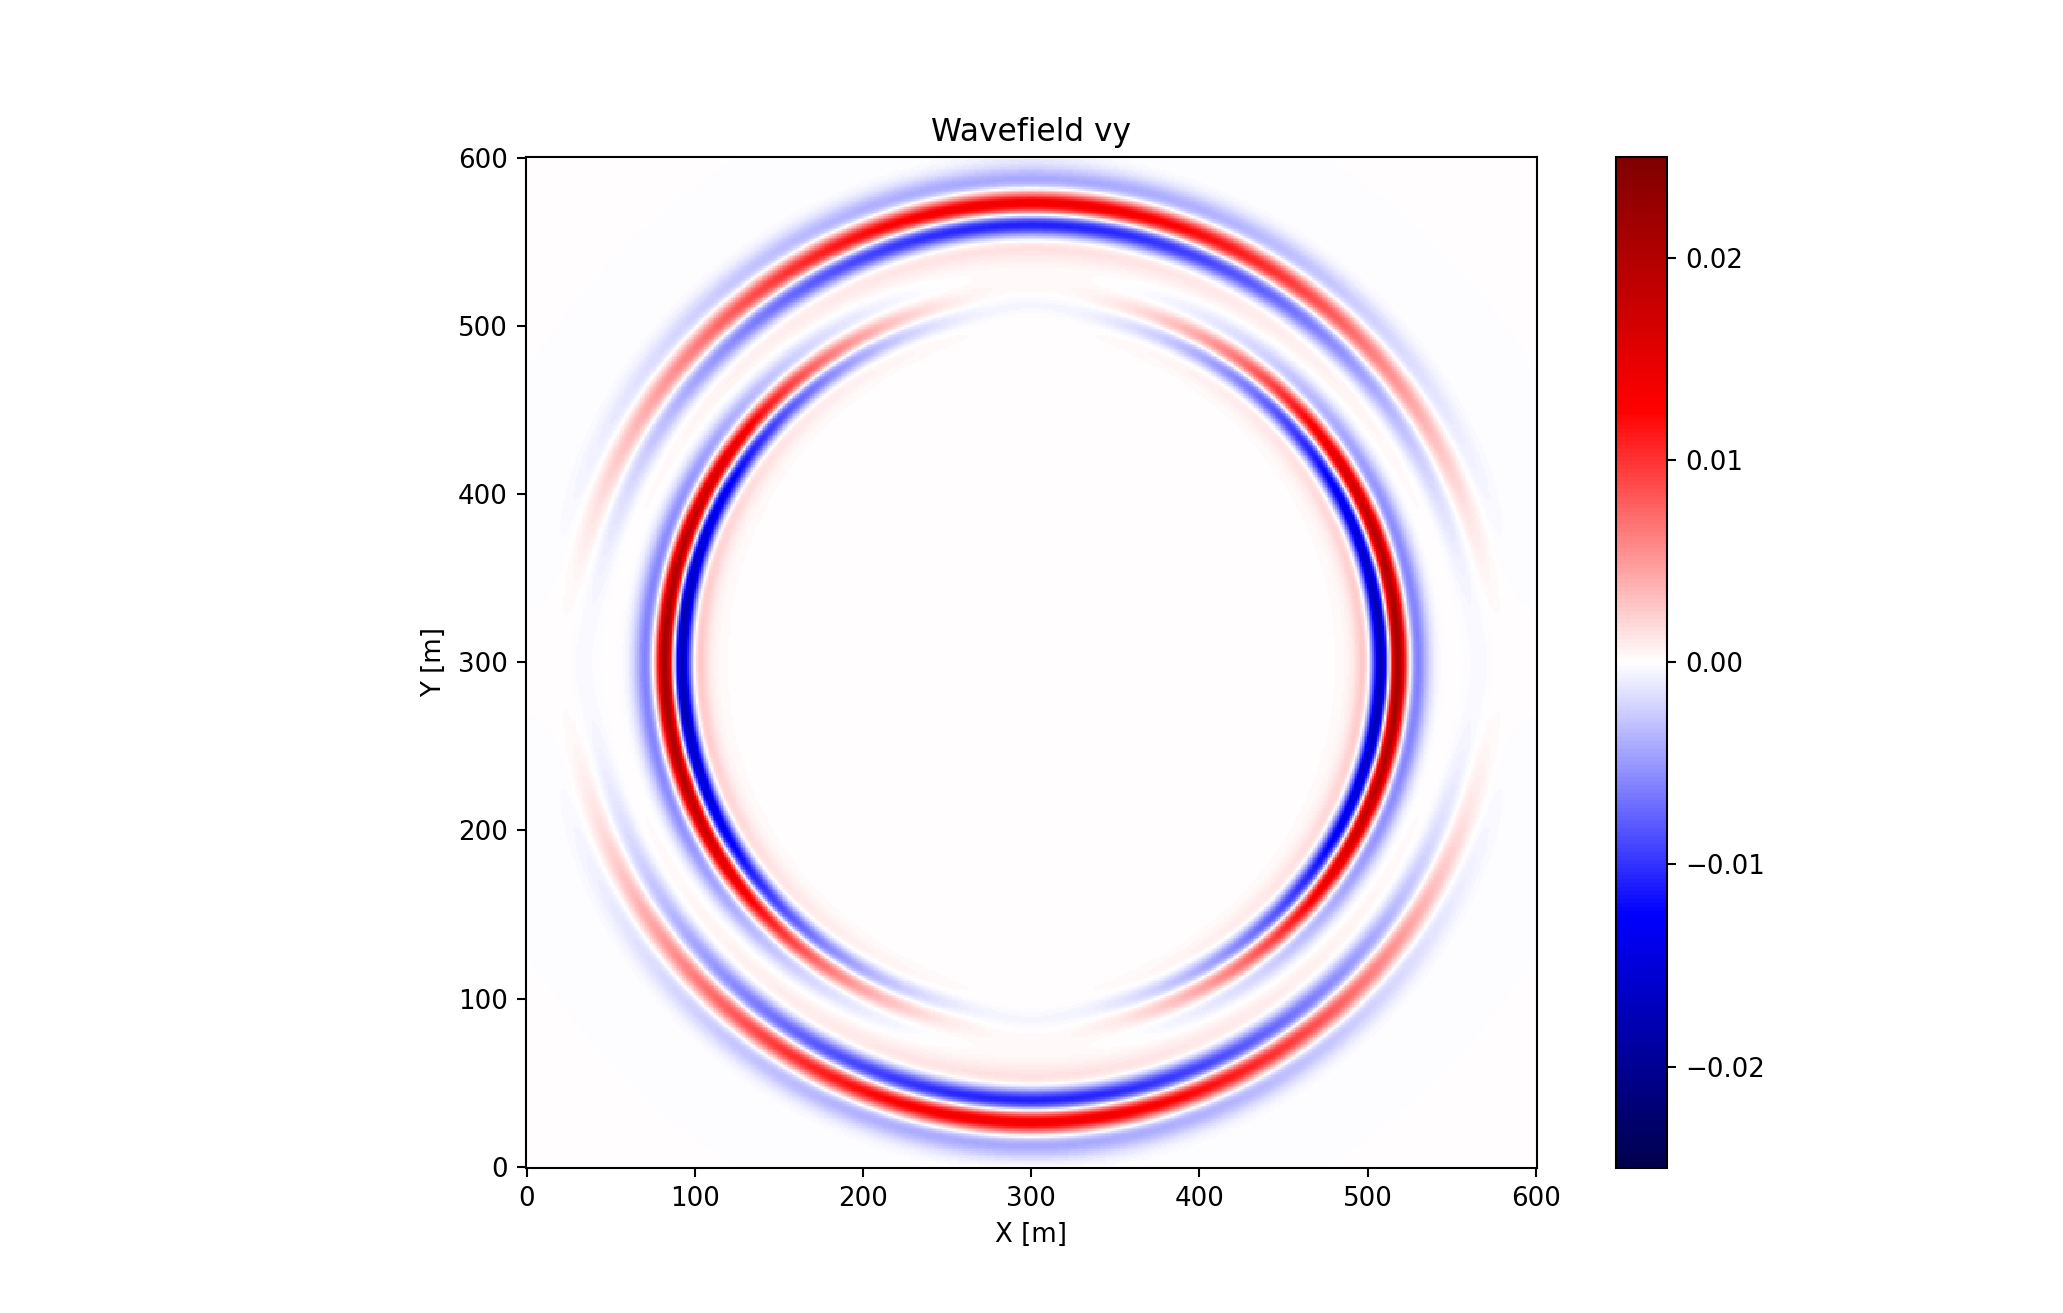

In [7]:
# run 2D PSV code
vy, vy = psv_mod(nt, nx, ny, dt, dh, rho, lam, mu, clip, isnap, X, Y)

vy波场快照显示了P波和s波在均匀块模型中的直接传播。注意沿波前圆周的振幅分布。由于冲击源的原因，纵波的最大振幅发生在冲击的方向上，垂直于横波的冲击。振幅的最小值位于90°偏移处。 

---
__Text provided under a Creative Commons Attribution license, CC-BY.  All code is made available under the GNU GPL 3.0 license.  (c) Daniel Köhn, Denise De Nil 2017. This notebook is inspired by the [CFDPython](https://github.com/barbagroup/CFDPython) course (c) Lorena A. Barba, Gilbert F. Forsyth 2015__